### This script is using Python to perform Optical Character Recognition (OCR) on an image and then write the text along with the bounding boxes to a text file. It begins with different image preprocessing methods to find the best way to create the most accurate model. Various preprocessing methods and models will be tested here.


#### Now, let's start by using the Tesseract OCR engine through the pytesseract Python wrapper and Python Imaging Library (PIL) to handle the image without any pre-processing. This will allow us to see the raw OCR results, which we can later compare with results obtained after applying different pre-processing methods.


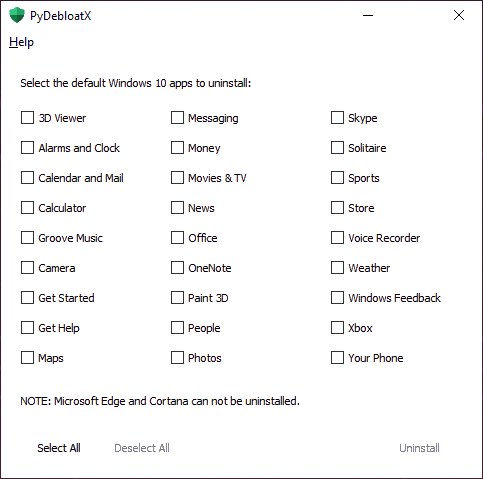

In [16]:
import pytesseract
from PIL import Image
from IPython.display import display, HTML
import time
from PIL import Image


# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = "C:\\Users\\abulabn\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe"

# Read the image


def is_within_range(pixel, color1, color2, margin=0):
    return all(c1 - margin <= p <= c2 + margin or c2 - margin <= p <= c1 + margin for p, c1, c2 in zip(pixel, color1, color2))

def convert_to_white(img, color1, color2, margin=0):
    pixels = img.load()
    
    # Iterate through each pixel
    for x in range(img.width):
        for y in range(img.height):
            pixel = pixels[x, y]
            # If the pixel's color is in range, change it to white
            if is_within_range(pixel, color1, color2, margin):
                pixels[x, y] = (255, 255, 255)
    
    # Return the modified image
    return img
img = Image.open('testingdata.png')
# Perform OCR
# Define the color ranges
color1 = (210, 211, 217)  # bottom color
color2 = (232, 233, 239)  # top color
margin = 60
# Define the input and output image paths

# Convert pixels within the color range to white
img =convert_to_white(img, color1, color2, margin)
raw_text = pytesseract.image_to_string(img, lang='eng', config='--psm 6')


# Display the image
display(img)

# Display the OCR result
html_code = f"""
<div style="margin-left:20px;">
    <h4>Raw OCR Result without Pre-processing:</h4>
    <pre>{raw_text}</pre>
</div>
"""
display(HTML(html_code))




## Convert GUI Elements to White
This code snippet is part of a function that processes an image by converting the color of GUI elements such as buttons to white. This could be useful, for example, if you want to isolate text or other elements in a screenshot or image of a GUI.

In [ ]:
def is_within_range(pixel, color1, color2, margin=0):
    return all(c1 - margin <= p <= c2 + margin or c2 - margin <= p <= c1 + margin for p, c1, c2 in zip(pixel, color1, color2))

def convert_to_white(img, color1, color2, margin=0):
    pixels = img.load()
    
    # Iterate through each pixel
    for x in range(img.width):
        for y in range(img.height):
            pixel = pixels[x, y]
            # If the pixel's color is in range, change it to white
            if is_within_range(pixel, color1, color2, margin):
                pixels[x, y] = (255, 255, 255)
    
    # Return the modified image
    return img
img = Image.open('testingdata.png')
# Perform OCR
# Define the color ranges
color1 = (210, 211, 217)  # bottom color
color2 = (232, 233, 239)  # top color
margin = 60
# Define the input and output image paths

# Convert pixels within the color range to white
img =convert_to_white(img, color1, color2, margin)

 ### to calculate the accuracy of the OCR text output against the ground truth (real text) using the Levenshtein distance, which is a string metric for measuring the difference between two sequences (strings). In this case, the sequences are your OCR output and the ground truth text.

The Levenshtein distance can be thought of as the minimum number of single character edits (insertions, deletions or substitutions) required to change one word into another.


In [17]:
def levenshtein_distance(str1, str2):
    m = len(str1)
    n = len(str2)
    d = [[0 for _ in range(n+1)] for _ in range(m+1)]

    for i in range(m+1):
        d[i][0] = i
    for j in range(n+1):
        d[0][j] = j
    for j in range(1, n+1):
        for i in range(1, m+1):
            substitution_cost = 0 if str1[i-1] == str2[j-1] else 1
            d[i][j] = min(d[i-1][j] + 1,                  # deletion
                          d[i][j-1] + 1,                  # insertion
                          d[i-1][j-1] + substitution_cost) # substitution
    return d[m][n]


In [18]:
def ocr_accuracy(real_text, ocr_text):
    # Remove unnecessary whitespaces and convert to lower case for a fair comparison
    real_text = real_text.replace(" ", "").lower()
    ocr_text = ocr_text.replace(" ", "").lower()

    # Calculate Levenshtein distance
    levenshtein_dist = levenshtein_distance(real_text, ocr_text)

    # Normalize by length of real_text to get accuracy
    accuracy = (1 - levenshtein_dist / len(real_text)) * 100

    return accuracy

Here the GUI text is read and written manually.

In [19]:


# The real text
real_text = """PyDeblowx - x
Help
Select the defeult Windows 10 apps to uninstall:
3D viewer D1 Messaging Skype
alarms and clock Money Solitaiar
calendar and Mail Movies & Tv sports
calculator News  Store
groove Music Office voice Recorder
camera onenote  weather
Get started  paint  Windows Feedback
Get Help People xbox 
Maps Photos  Your Phone
NOTE: Microsoft Edge and Cortana can not be uninstalled.
Select Al Deselect all Uninstall"""


# Your OCR output (replace ocr_text with the text obtained from OCR)
ocr_text = "YOUR_OCR_TEXT_HERE"

# Calculate accuracy
accuracy = ocr_accuracy(real_text, raw_text)
print(f"OCR Accuracy: {accuracy:.2f}%")

OCR Accuracy: 81.77%


the Accuracy is  is only 61.3% which is not good enough. 
now we will try to improve the accuracy by preprocessing the image.

In [20]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
from IPython.display import display

# Note the start time for performance measurement
start_time = time.time()

to improve the quality and accuracy of the subsequent text recognition algorithm. Erosion can help remove small noise or irregularities in the image, smooth out text boundaries, and enhance the contrast between text and background. By shrinking the boundaries of objects, erosion can also help separate closely connected characters or reduce the thickness of characters, making them more distinguishable for the text recognition process.


After Erosion:


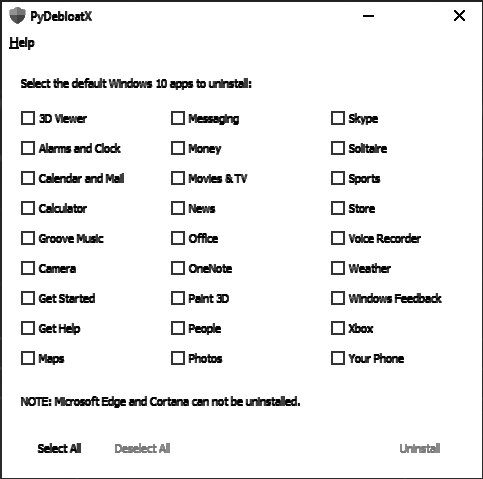

In [21]:
def erode(image, kernel_size):
    cv_image = np.array(image.convert("L"))
    kernel = np.ones(kernel_size, np.uint8)
    eroded_image = cv2.erode(cv_image, kernel, iterations=1)
    return Image.fromarray(eroded_image)

print("After Erosion:")
eroded_image = erode(img, kernel_size=(2, 2))
display(eroded_image)

In [22]:
# Perform OCR on the preprocessed image
# print("OCR Result after Erosion::")
# preprocessed_text = pytesseract.image_to_string(eroded_image)
# accuracy = ocr_accuracy(real_text, preprocessed_text)
# print("OCR Accuracy: ", accuracy, "%")

By combining erosion and dilation as preprocessing steps before text recognition, you can leverage their complementary effects. Erosion helps remove noise, separate characters, and reduce thickness, while dilation fills gaps, expands text regions, and increases thickness. These operations can collectively improve the overall quality, legibility, and extraction of text from images, leading to better performance in text recognition tasks.

In [23]:
def dilate(image, kernel_size):
    cv_image = np.array(image.convert("L"))
    kernel = np.ones(kernel_size, np.uint8)
    dilated_image = cv2.dilate(cv_image, kernel, iterations=1)
    return Image.fromarray(dilated_image)

eroded_image = erode(img, kernel_size=(2, 2))

# Dilation
# print("After Dilation:")
dilated_image = dilate(eroded_image, kernel_size=(2, 2))
# display(dilated_image)
# Perform OCR on the preprocessed image
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Time taken: {elapsed_time:.2f} seconds")

In [24]:
# Perform OCR on the preprocessed image
# print("OCR Result after Dilation::")
# preprocessed_text = pytesseract.image_to_string(eroded_image)
# accuracy = ocr_accuracy(real_text, preprocessed_text)
# print("OCR Accuracy: ", accuracy, "%")

C:\Users\abulabn\AppData\Local\Temp\ipykernel_7188\4034317940.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize((width, height), Image.ANTIALIAS)


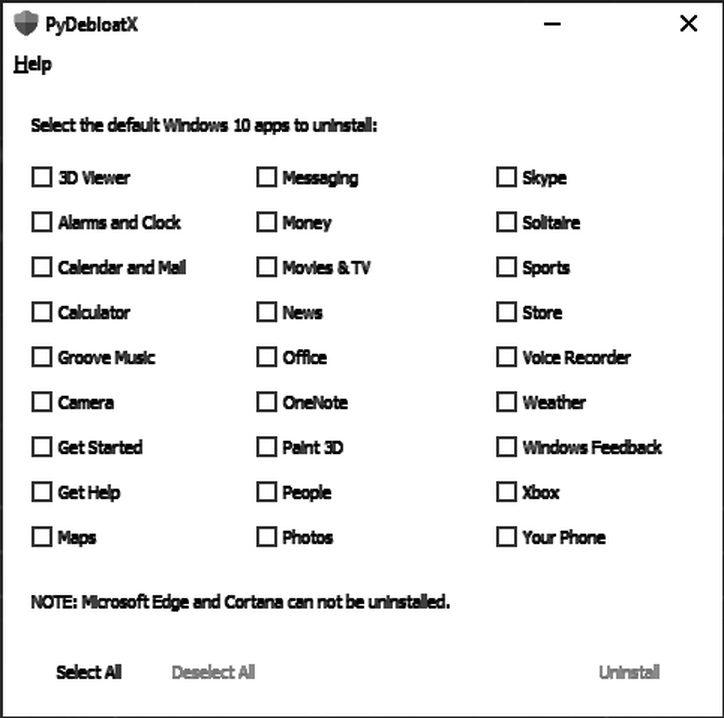

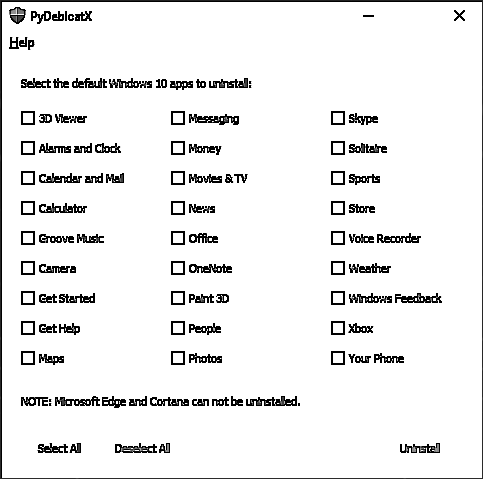

In [25]:
# Edge Enhancement
# print("After Edge Enhancement:")


def resize_image(image, scale_percent):
    width = int(image.width * scale_percent / 100)
    height = int(image.height * scale_percent / 100)
    return image.resize((width, height), Image.ANTIALIAS)

def gaussian_blur(image, kernel_size):
    cv_image = np.array(image)
    blurred_image = cv2.GaussianBlur(cv_image, (kernel_size, kernel_size), 0)
    return Image.fromarray(blurred_image)

ersized_image = resize_image(eroded_image, scale_percent=150)
display(ersized_image)


def adaptive_threshold(image):
    cv_image = np.array(image.convert("L"))
    threshold_image = cv2.adaptiveThreshold(cv_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return Image.fromarray(threshold_image)

def deskew(image):
    cv_image = np.array(image.convert("L"))
    coords = np.column_stack(np.where(cv_image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = cv_image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(cv_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return Image.fromarray(rotated)

# Gaussian Blur
# print("After Gaussian Blur:")
# blurred_image = gaussian_blur(ersized_image, kernel_size=5)
# display(blurred_image)

# # Adaptive Threshold
# # print("After Adaptive Threshold:")
# threshold_image = adaptive_threshold(blurred_image)
# display(threshold_image)

# # Deskew
# # print("After Deskew:")
# deskewed_image = deskew(threshold_image)
# display(deskewed_image)


edge_enhanced_image = eroded_image.filter(ImageFilter.EDGE_ENHANCE_MORE)
display(edge_enhanced_image)

# display(edge_enhanced_image)

The main benefit of converting an image to a 1-bit binary format after erosion and dilation is improved accuracy in text recognition. By converting the image to a binary representation, the subsequent text recognition algorithm can focus on the presence or absence of text rather than dealing with multiple grayscale levels or variations in pixel intensity.

Converting the image to a binary format simplifies the text recognition process and can help in the following ways:

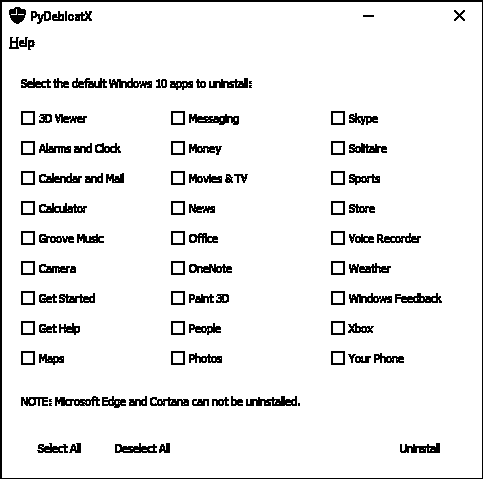

In [26]:
def convert_to_1bit(image, threshold: int = None):
    if image.mode != "L":
        image = image.convert("L")
    if not threshold:
        threshold = image.getextrema()[0] + (image.getextrema()[1] - image.getextrema()[0]) / 2
    return image.point(lambda x: 255 if x > threshold else 0, "1")
# Convert to 1-bit
# print("After Conversion to 1-bit:")
one_bit_image = convert_to_1bit(edge_enhanced_image, threshold=220)
display(one_bit_image)
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Time taken: {elapsed_time:.2f} seconds")

In [27]:
# Perform OCR on the preprocessed image
# print("OCR Result after to 1-bit:n::")
preprocessed_text = pytesseract.image_to_string(one_bit_image, lang="eng", config="--psm 6")
print(preprocessed_text)
accuracy = ocr_accuracy(real_text, preprocessed_text)
print("OCR Accuracy: ", accuracy, "%")
# Calculate the time taken
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")


# R=30, G=177, B=211 (balu)
# R=210, G=211, B=217 (buttom button)
# R=232, G=233, B=239 (top button)

S PyDeblowx - x
Help
Select the defeuft Windoves 30 apps to uninstall:
Da vewer D1 Messaging Ostape
D1 alarms and clock, (Money Ci sottaire
Di calendar and Mall Di) Moves a1y D sports
Ci cabaustor news O store
Drove Muse Dofice D1 Vokce Recorder
Dleanera Dlonenote Dweather
Dicetstarted Opantso D1 Winders Feedback
Cleetttep D1 People Dxtox:
Omens D1 Photos D1 Your Phone
NOTE: Microsoft Edge and Cortana can notbe uninstaled,
SeectAl Deselect al Unita

OCR Accuracy:  74.86187845303867 %
Time taken: 0.34 seconds
